In [1]:
# project: p6
# submitter: swu427
# partner: none
# hours: 20

In [2]:
import geopandas as gpd
import sqlite3
import pandas as pd
import math
import sklearn
import numpy as np
import rasterio
from rasterio.mask import mask

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# new import statements
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, r2_score


In [3]:
#Q1
counties = gpd.read_file("counties.geojson")
counties["NAME"].size


72

<Axes: >

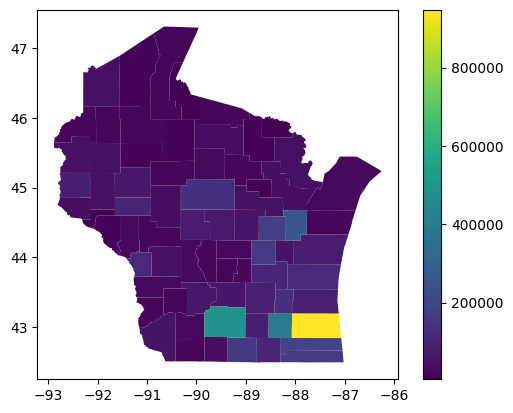

In [4]:
#Q2
fig = counties.plot(column = "POP100", cmap = "viridis", legend = True)
fig

In [5]:
conn = sqlite3.connect("counties_tracts.db")
pd.read_sql("""SELECT * FROM counties sqlite_master""", conn)
counties["AREALAND"] = pd.read_sql("""SELECT AREALAND FROM counties sqlite_master""", conn)

train, test = train_test_split(counties, random_state = 250, test_size=0.25)
train

,NAME,POP100,geometry,AREALAND
32,Oneida County,35998,"POLYGON ((-89.04693 45.63753, -89.04693 45.638...",2883704998
44,Forest County,9304,"POLYGON ((-88.67548 45.89629, -88.67548 45.896...",2626939844
39,Green County,36842,"POLYGON ((-89.60237 42.85738, -89.61539 42.857...",1512443837
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
12,Dodge County,88759,"POLYGON ((-88.76542 43.63308, -88.76546 43.633...",2268044444
18,Marinette County,41749,"POLYGON ((-88.05930 45.71306, -88.05944 45.713...",3624599496
13,Burnett County,15457,"POLYGON ((-92.46458 45.98361, -92.46457 45.983...",2127832847
64,Brown County,248007,"POLYGON ((-88.13118 44.67693, -88.13585 44.676...",1372928783
24,Polk County,44205,"POLYGON ((-92.15503 45.55350, -92.15497 45.558...",2368077722
40,Green Lake County,19051,"POLYGON ((-89.00685 43.63305, -89.00674 43.633...",905556950


In [6]:
#Q3
test_list = []
for name in test["NAME"]:
    test_list.append(name)
test_list

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [7]:
#Q4
xcols = ["AREALAND"]
ycol = "POP100"

model = LinearRegression()
model_train = model.fit(train[xcols], train[ycol])
score = model.score(test[xcols], test[ycol])
score

0.016720430179409274

In [8]:
#Q5
# What is the predicted population of a county with 400 square miles of area, according to the model?
# Land Area (Square Meters) - Created for statistical purposes only.

square_meter_conversion = (400*2.59) * 1000000
predict_df = pd.DataFrame({"AREALAND": [square_meter_conversion]})
predict_df["predicted population"] = model.predict(predict_df) 
predict_df.iloc[0]["predicted population"]

90000.07422783462

In [9]:
#Q6
conn = sqlite3.connect("counties_tracts.db")
pd.read_sql("""
    SELECT counties.NAME, SUM(HU100) AS HU100 FROM tracts INNER JOIN counties ON tracts.COUNTY = counties.COUNTY GROUP BY counties.COUNTY ORDER BY counties."index"
""", conn)
counties["HU100"] = pd.read_sql("""
    SELECT SUM(HU100) AS HU100 FROM tracts INNER JOIN counties ON tracts.COUNTY = counties.COUNTY GROUP BY counties.COUNTY ORDER BY counties."index"
""", conn)
counties

train, test = train_test_split(counties, random_state = 250, test_size=0.25)
train

test_list = []
for name in test["NAME"]:
    test_list.append(name)
test_list

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [10]:
#Q7
df = test[["NAME", "HU100"]]
df.set_index("NAME")["HU100"].to_dict()

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [11]:
#Q8
xcols = ["HU100"]
ycol = "POP100"
model = LinearRegression()
scores = cross_val_score(model, train[xcols], train[ycol])
scores.mean()

0.9739348181232653

In [12]:
#Q9
scores.std()

0.01693954236334351

In [13]:
#Q10
model.fit(train[xcols], train[ycol])
f"POP100 = {model.coef_[0].round(2)}*HU100 + {model.intercept_.round(2)}"

'POP100 = 2.47*HU100 + -9276.89'

/tmp/ipykernel_15659/2876941653.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  counties.plot.scatter(x = "HU100", y= "POP100", ax=ax, label="Actual").text(float(brown_county[xcols[0]]), float(brown_county[ycol]), "Brown", ha='right', va='bottom')


Text(104371.0, 248007.0, 'Brown')

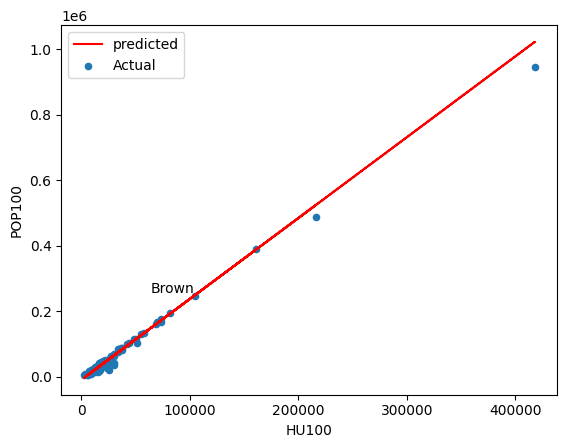

In [14]:
#Q11
predict_df = pd.DataFrame(counties[["HU100"]])
xcols = ["HU100"]
ycol = "POP100"
predict_df["predicted"] = model.predict(predict_df)
brown_county = counties[counties['NAME'] == 'Brown County']
ax = predict_df.plot.line(x="HU100", y="predicted", color="r")
counties.plot.scatter(x = "HU100", y= "POP100", ax=ax, label="Actual").text(float(brown_county[xcols[0]]), float(brown_county[ycol]), "Brown", ha='right', va='bottom')

In [15]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

len(A[(A >= 3) & (A <= 6)])

8

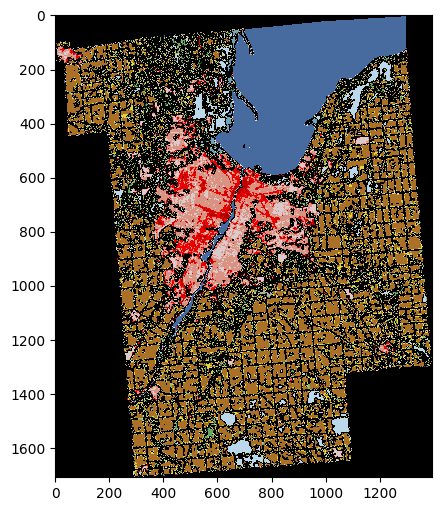

In [16]:
#Q13
land = rasterio.open("zip://../p6/land.zip!wi.tif")
brown = counties[counties["NAME"] == "Brown County"]
matrix, _ = mask(land, brown.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap = custom_cmap)
 

In [17]:
#Q14
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}


open_water_code = land_use["open_water"]
zeros_count = np.count_nonzero(matrix)
open_water_count = np.count_nonzero(matrix == open_water_code)
proportion = open_water_count/zeros_count
proportion

0.13797526789725206

In [18]:
land = rasterio.open("zip://../p6/land.zip!wi.tif")
ice_snow_list = []
ice_snow_code = land_use["ice_snow"]

for idx in range(len(counties)):
    county_df = counties.iloc[[idx]]
    matrix, _ = mask(land, county_df.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    counties_count = np.count_nonzero(matrix)
    ice_snow_count = np.count_nonzero(matrix == ice_snow_code)
    proportion = ice_snow_count/counties_count
    ice_snow_list.append(proportion)
counties["Ice Snow"] = ice_snow_list


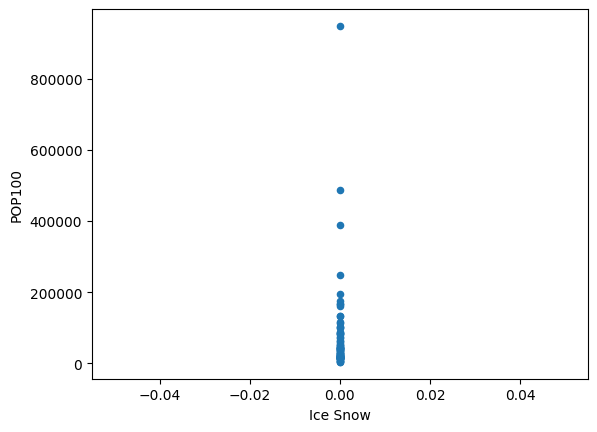

In [19]:
#Q15
ax = counties.plot.scatter(x= "Ice Snow", y="POP100" )


In [20]:

tracts = gpd.read_file("tracts.shp")
gpd_df = tracts.to_crs(land.crs)

In [21]:
for key in land_use:
    gpd_df[key] = 0
for idx in range(len(gpd_df)):
    row_df = gpd_df.iloc[[idx]]
    matrix, _ = mask(land, row_df["geometry"], crop=True)
    matrix = matrix[0]
    for key in land_use:
        sum_key = np.count_nonzero(matrix == land_use[key])
        gpd_df.at[idx,key] = sum_key

In [22]:
gpd_df

,GEOID,POP100,geometry,open_water,ice_snow,developed_open,developed_low,developed_med,developed_high,barren,...,dwarf_scrub,shrub_scrub,grassland,sedge,lichens,moss,pasture,crops,woody_wetlands,herbacious_wetlands
0,55001950204,1646,"POLYGON ((476459.321 2359023.337, 476451.046 2...",55465,0,12351,5402,833,104,175,...,0,18518,33652,0,0,0,3136,73433,84766,20975
1,55009940002,4698,"POLYGON ((621899.492 2417088.085, 621887.848 2...",57,0,1456,2104,1211,243,229,...,0,23,38,0,0,0,770,1503,2317,123
2,55061990000,0,"POLYGON ((672119.958 2401253.560, 672233.404 2...",2107187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55009020100,5817,"POLYGON ((637138.410 2436942.838, 640613.785 2...",117008,0,6209,7738,1971,337,718,...,0,60,327,0,0,0,17419,112681,26017,2677
4,55009010100,6506,"POLYGON ((628917.973 2411150.565, 629625.110 2...",530,0,1141,2711,1109,174,2,...,0,0,52,0,0,0,23,2,79,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,55139003100,2046,"POLYGON ((599079.049 2379457.015, 599081.372 2...",2848,0,119,676,467,299,0,...,0,0,3,0,0,0,51,0,40,0
1538,55079017900,2879,"POLYGON ((655219.585 2250069.887, 655234.899 2...",0,0,0,38,491,153,0,...,0,0,0,0,0,0,0,0,0,0
1539,55059000800,2763,"POLYGON ((664221.429 2206827.091, 664242.297 2...",0,0,328,163,748,200,1,...,0,0,0,0,0,0,0,0,0,0
1540,55025013700,7107,"POLYGON ((520513.435 2238213.310, 520512.428 2...",329,0,1215,2209,1799,477,21,...,0,42,52,0,0,0,3861,8236,382,371


<Axes: >

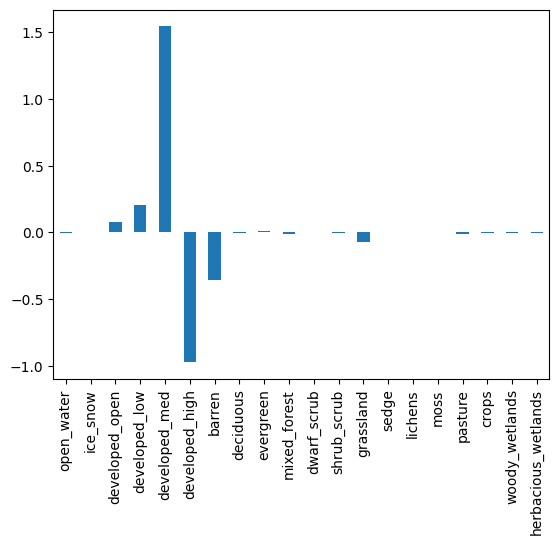

In [23]:
#Q16
train, test = train_test_split(gpd_df, random_state = 300, test_size=0.20)
xcols = list(land_use.keys())
ycol= "POP100"
model = LinearRegression()
model.fit(train[xcols], train[ycol])
ax = pd.Series(model.coef_, index=xcols).plot.bar()
ax

In [24]:
#Q17
gpd_df
model1 = LinearRegression()
xcols = ["open_water"]
ycol = "POP100"
model1.fit(train[xcols], train[ycol])
model1_score = cross_val_score(model, train[xcols], train[ycol]).mean()

model2 = LinearRegression()
xcols = ["developed_med"]
ycol = "POP100"
model2.fit(train[xcols], train[ycol])
model2_score = cross_val_score(model, train[xcols], train[ycol]).mean() 

# print(model1_score, model2_score)
model2_score


# model2 has a stronger relationship to developed med and POP100 because of the mean scores that we got back from cross_val_score.I could be wrong but I also think that model2 has higher variance which is seen in the cross val scores, account for 38% of the variance, 
#you can confirm by the plot in the question #16 plot. You can see the features that impact the most model one of them being the developed med, then to confirm my suspicion of it being one feature that is higher in variance 
# I chose one of the lower variance features like open water and then saw that it had lower cross_val score. 

0.379921514850355